<a href="https://colab.research.google.com/github/dfukagaw28/ColabNotebooks/blob/main/mmdet%E3%82%92%E8%A9%A6%E3%81%99_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# mmdet を試す (2)

*   説明を省略して一直線に実行する。

## 準備

In [1]:
%%time
!pip install torch==2.1 torchvision==0.16 torchaudio==2.1 --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 GB 725.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 94.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 67.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 MB 8.7 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.4.1+cu121
    Uninstalling torch-2.4.1+cu121:
      Successfully uninstalled torch-2.4.1+cu121
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.19.1+cu121
    Uninstalling torchvision-0.19.1+cu121:
      Successfully uninstalled torchvision-0.19.1+cu121
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 2.4.1+cu121
    Uninstalling torchaudio-2.4.1+cu121:
      Successfully uninstalled torchaudio-2.4.1+cu121
CPU times: user 1.33 s, sys: 212 ms, total: 1.54 s
Wall time: 2min 42s


In [ ]:
# このセルを実行後，再起動が必要
!pip install openmim

In [3]:
!pip install -U albumentations

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.0/224.0 kB 22.8 MB/s eta 0:00:00
  Attempting uninstall: albucore
    Found existing installation: albucore 0.0.16
    Uninstalling albucore-0.0.16:
      Successfully uninstalled albucore-0.0.16
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.4.15
    Uninstalling albumentations-1.4.15:
      Successfully uninstalled albumentations-1.4.15


In [2]:
!pip check

ipython 7.34.0 requires jedi, which is not installed.
pygobject 3.42.1 requires pycairo, which is not installed.
google-colab 1.0.0 has requirement requests==2.32.3, but you have requests 2.28.2.
pymc 5.16.2 has requirement rich>=13.7.1, but you have rich 13.4.2.
pytensor 2.25.5 has requirement filelock>=3.15, but you have filelock 3.14.0.
yfinance 0.2.44 has requirement requests>=2.31, but you have requests 2.28.2.


In [3]:
!mim install mmdet 'mmcv<2.2.0' -f https://download.openmmlab.com/mmcv/dist/cu121/torch2.1/index.html

Looking in links: https://download.openmmlab.com/mmcv/dist/cu121/torch2.1/index.html, https://download.openmmlab.com/mmcv/dist/cu121/torch2.1.0/index.html
  Using cached https://download.openmmlab.com/mmcv/dist/cu121/torch2.1.0/mmcv-2.1.0-cp310-cp310-manylinux1_x86_64.whl (94.1 MB)
Ignoring mmcv: markers 'extra == "mim"' don't match your environment
Ignoring mmengine: markers 'extra == "mim"' don't match your environment


## デモ用の画像をダウンロードする

In [4]:
!wget -P demo https://raw.githubusercontent.com/open-mmlab/mmdetection/refs/heads/main/demo/demo.jpg

--2024-10-15 19:48:30--  https://raw.githubusercontent.com/open-mmlab/mmdetection/refs/heads/main/demo/demo.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 259865 (254K) [image/jpeg]
Saving to: ‘demo/demo.jpg’

demo.jpg            100%[===================>] 253.77K  --.-KB/s    in 0.004s  

2024-10-15 19:48:30 (66.2 MB/s) - ‘demo/demo.jpg’ saved [259865/259865]



## RTMDet を試す

In [5]:
!mim download mmdet --config rtmdet_tiny_8xb32-300e_coco --dest .

processing rtmdet_tiny_8xb32-300e_coco...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 MiB 45.4 MB/s eta 0:00:00
Successfully downloaded rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth to /content
Successfully dumped rtmdet_tiny_8xb32-300e_coco.py to /content


In [6]:
!ls -l rtmdet*

-rw-r--r-- 1 root root 57532893 Oct 15 19:48 rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth
-rw-r--r-- 1 root root    14363 Oct 15 19:48 rtmdet_tiny_8xb32-300e_coco.py


Loads checkpoint by local backend from path: ./rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: data_preprocessor.mean, data_preprocessor.std

10/15 19:48:53 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmdet" is a correct scope, or whether the registry is initialized.


Output()

/usr/local/lib/python3.10/dist-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming 
release, it will be required to pass the indexing argument. (Triggered internally at 
../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]

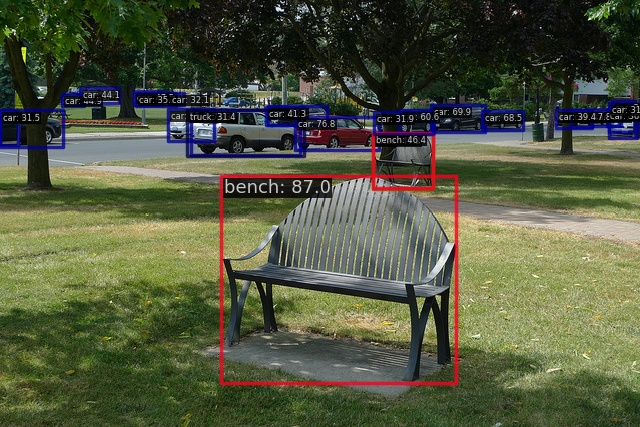

In [7]:
from PIL import Image
from mmdet.apis import DetInferencer

model_name = './rtmdet_tiny_8xb32-300e_coco.py'
checkpoint = './rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth'
inferencer = DetInferencer(model_name, checkpoint)

img = './demo/demo.jpg'
result = inferencer(img, out_dir='./output')

Image.open('./output/vis/demo.jpg')

## Mask R-CNN を試す

In [8]:
!mim download mmdet --config mask-rcnn_r50_fpn_1x_coco --dest .

processing mask-rcnn_r50_fpn_1x_coco...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 MiB 84.2 MB/s eta 0:00:00
Successfully downloaded mask_rcnn_r50_fpn_1x_coco_20200205-d4b0c5d6.pth to /content
Successfully dumped mask-rcnn_r50_fpn_1x_coco.py to /content


In [9]:
!ls -l mask*

-rw-r--r-- 1 root root 177862517 Oct 15 19:49 mask_rcnn_r50_fpn_1x_coco_20200205-d4b0c5d6.pth
-rw-r--r-- 1 root root     10474 Oct 15 19:49 mask-rcnn_r50_fpn_1x_coco.py


Loads checkpoint by local backend from path: ./mask_rcnn_r50_fpn_1x_coco_20200205-d4b0c5d6.pth


Output()

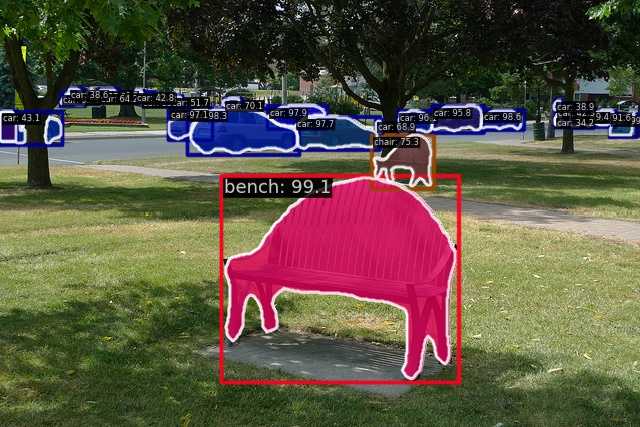

In [10]:
from PIL import Image
from mmdet.apis import DetInferencer

model_name = './mask-rcnn_r50_fpn_1x_coco.py'
checkpoint = './mask_rcnn_r50_fpn_1x_coco_20200205-d4b0c5d6.pth'
inferencer = DetInferencer(model_name, checkpoint)

img = './demo/demo.jpg'
result = inferencer(img, out_dir='./output')

Image.open('./output/vis/demo.jpg')